In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score


df = pd.read_csv(
    './wdbc.data'
    ,header=None
)
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values


le = LabelEncoder()
y = le.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)


# Under-sampling using RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)
print("Under-sampled class distribution:", np.bincount(y_under_resampled))


# Over-sampling using SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_over_resampled, y_over_resampled = smote.fit_resample(X, y)
print("Over-sampled class distribution:", np.bincount(y_over_resampled))


from imblearn.combine import SMOTETomek
smote_tomek=SMOTETomek(random_state=42)
X_combine_resampled,y_combine_resampled=smote_tomek.fit_resample(X,y)
print(np.bincount(y_combine_resampled))

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156, max_depth=3)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)


Under-sampled class distribution: [212 212]
Over-sampled class distribution: [357 357]
[348 348]


DecisionTreeClassifier(max_depth=3, random_state=156)

In [3]:
from sklearn.tree import export_graphviz


# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="./tree.dot", class_names=iris_data.target_names , \
feature_names = iris_data.feature_names, impurity=True, filled=True)

Feature importances:
[0.    0.    0.558 0.442]
sepal length (cm) : 0.000
sepal width (cm) : 0.000
petal length (cm) : 0.558
petal width (cm) : 0.442


<Axes: >

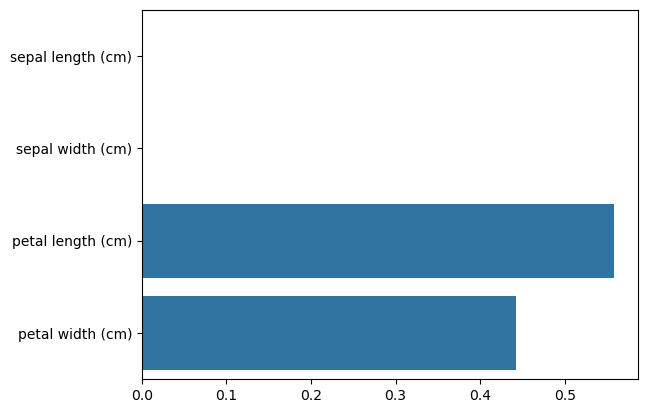

In [6]:
# 피처 중요도 시각화
# 피처 중요도 파악
import seaborn as sns
import numpy as np
# %matplotlib inline


# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))


# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))


# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_ , y=iris_data.feature_names)

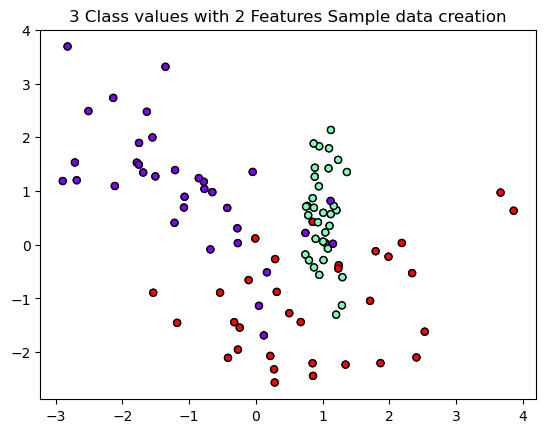

In [8]:
# 과적합 처리
# 데이터 생성
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


plt.title("3 Class values with 2 Features Sample data creation")


# 2차원 시각화를 위해서 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1,random_state=0)


# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')
plt.show()

In [11]:
import numpy as np


# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
   
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
   
    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
   
    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    plt.show()


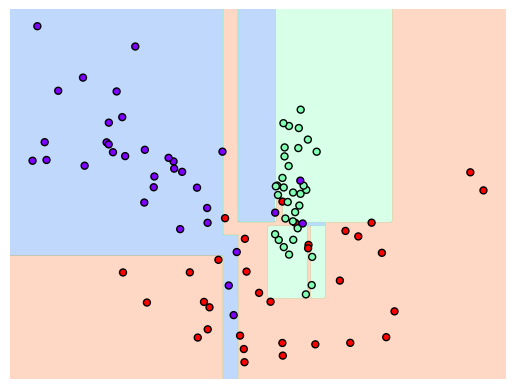

In [12]:


from sklearn.tree import DecisionTreeClassifier


# 학습이 종료된 모델 나왔다
dt_clf=DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)
plt.show()

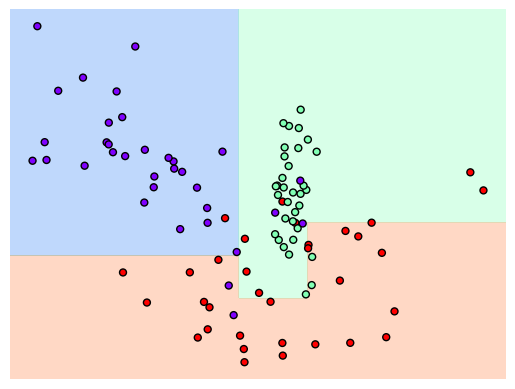

In [13]:
# min_samples_leaf=6 으로 트리 생성 조건을 제약한 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)